In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Define image data generators for training, validation, and testing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/chest_xray/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load validation data
val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/chest_xray/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/chest_xray/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


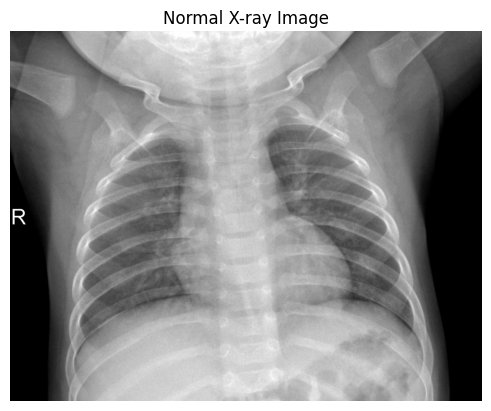

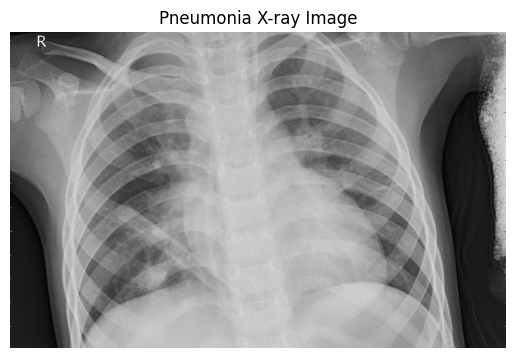

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Define the paths to the training dataset
train_normal_dir = '/content/drive/MyDrive/chest_xray/train/NORMAL'  # Replace with actual path
train_pneumonia_dir = '/content/drive/MyDrive/chest_xray/train/PNEUMONIA'  # Replace with actual path

# Function to load and display an image
def display_image(image_path, title):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

# Get a random normal image
normal_images = os.listdir(train_normal_dir)
normal_image_path = os.path.join(train_normal_dir, normal_images[0])  # Get the first normal image
display_image(normal_image_path, 'Normal X-ray Image')

# Get a random pneumonia image
pneumonia_images = os.listdir(train_pneumonia_dir)
pneumonia_image_path = os.path.join(train_pneumonia_dir, pneumonia_images[0])  # Get the first pneumonia image
display_image(pneumonia_image_path, 'Pneumonia X-ray Image')

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 515s 3s/step - accuracy: 0.7251 - loss: 0.6228 - val_accuracy: 0.6250 - val_loss: 0.9928
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.8322 - loss: 0.3445 - val_accuracy: 0.6250 - val_loss: 0.8840
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.8437 - loss: 0.3283 - val_accuracy: 0.6250 - val_loss: 2.0348
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.8685 - loss: 0.2902 - val_accuracy: 0.8125 - val_loss: 0.4173
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.8909 - loss: 0.2771 - val_accuracy: 0.8125 - val_loss: 0.6853
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.8896 - loss: 0.2516 - val_accuracy: 0.7500 - val_loss: 0.9383
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.8904 - loss: 0.2430 - val_accuracy: 0.7500 - val_loss: 0.7703
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.9032 - loss: 0.2401 - val_accuracy: 0.812

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Generate predictions
Y_pred = model.predict(test_generator)
y_pred = np.where(Y_pred > 0.5, 1, 0)

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

# Classification report
print(classification_report(test_generator.classes, y_pred))

20/20 ━━━━━━━━━━━━━━━━━━━━ 258s 14s/step - accuracy: 0.5783 - loss: 1.1616
Test Loss: 0.6160509586334229, Test Accuracy: 0.7820512652397156
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 817ms/step
[[105 129]
 [  7 383]]
              precision    recall  f1-score   support

           0       0.94      0.45      0.61       234
           1       0.75      0.98      0.85       390

    accuracy                           0.78       624
   macro avg       0.84      0.72      0.73       624
weighted avg       0.82      0.78      0.76       624



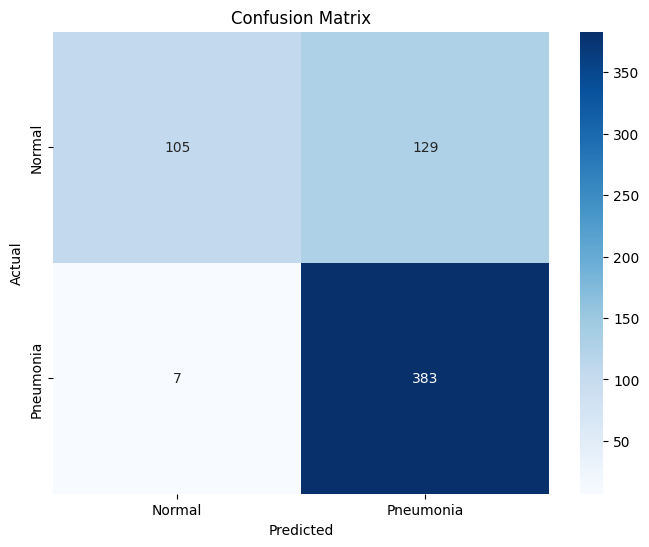

In [ ]:
import seaborn as sns

def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(cm)

In [ ]:
# Save the entire model
model.save('pneumonia_detection_model.h5')  # Save as HDF5 file

In [ ]:
from keras.models import load_model

# Load the model
loaded_model = load_model('pneumonia_detection_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


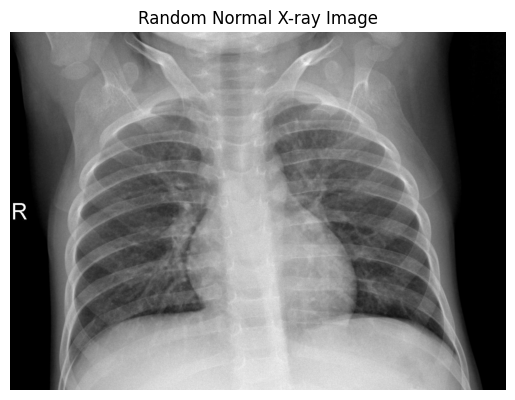

Normal Image Prediction: Normal (Confidence: 0.3102010190486908)


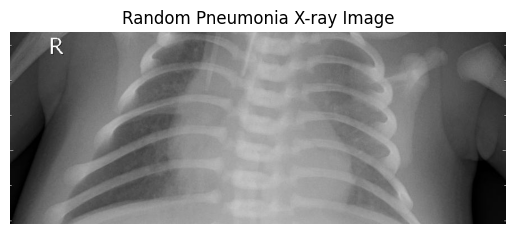

Pneumonia Image Prediction: Pneumonia (Confidence: 0.9992462396621704)


In [13]:
import random
# Define the path to the test dataset
test_normal_dir = '/content/drive/MyDrive/chest_xray/test/NORMAL'  # Replace with actual path
test_pneumonia_dir = '/content/drive/MyDrive/chest_xray/test/PNEUMONIA'  # Replace with actual path

# Function to load and display an image
def display_image(image_path, title):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

# Function to prepare the image for prediction
def prepare_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))  # Resize to match model input
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Randomly select an image from the test set
def get_random_image(test_dir):
    all_images = os.listdir(test_dir)
    random_image = random.choice(all_images)
    return os.path.join(test_dir, random_image)

# Get a random normal image and a random pneumonia image
random_normal_image_path = get_random_image(test_normal_dir)
random_pneumonia_image_path = get_random_image(test_pneumonia_dir)

# Prepare the images for prediction
normal_img = prepare_image(random_normal_image_path)
pneumonia_img = prepare_image(random_pneumonia_image_path)

# Make predictions
normal_prediction = model.predict(normal_img)
pneumonia_prediction = model.predict(pneumonia_img)

# Display the normal image and its prediction
display_image(random_normal_image_path, 'Random Normal X-ray Image')
print(f'Normal Image Prediction: {"Pneumonia" if normal_prediction[0][0] > 0.5 else "Normal"} (Confidence: {normal_prediction[0][0]})')

# Display the pneumonia image and its prediction
display_image(random_pneumonia_image_path, 'Random Pneumonia X-ray Image')
print(f'Pneumonia Image Prediction: {"Pneumonia" if pneumonia_prediction[0][0] > 0.5 else "Normal"} (Confidence: {pneumonia_prediction[0][0]})')